In [4]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(kf,phit,phi,L,run,duration):
        import numpy as np
        rm=0.005
        D=1.
        R=2*rm
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        f=1.0208582         
        rv=rm*f
        td =(2*rv)**2/(6*D)   
        kd = 4*math.pi*R*D*2
        kb=kf*kd
        with species_attributes():
            C | {'D':str(0.0),'radius':str(rv)}
            E | {'D':str(D),'radius':str(rv)}
            S | {'D':str(D),'radius':str(rv)}
            ES | {'D':str(0.0),'radius':str(rv)}
        with reaction_rules():
            #E+S >ES | kb
            E+S>~E+~S|kb


        m=get_model()
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rv,rng)
        w.bind_to(m)
        size=tuple(w.calculate_shape(Real3(L,L,L),rv))    
        Nev = size[0]*size[1]*size[2]
        NS=int(Nev*phit)
        NE=int(NS/5)
        Nc=int(Nev*phi)            
        w.add_molecules(Species('C'), Nc)
        w.add_molecules(Species('S'), NS)
        w.add_molecules(Species('E'), NE)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #duration = duration*td
        obs=FixedIntervalNumberObserver(td,['E','S'])
        sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T
        if run==1:
            print('kf={},phit={},phi={},L={}'.format(kf,phit,phi,L))
            #print('td={:.4e},kb={:.4e},kr={:.4e},kub={:.4e},kon={:.4e},Nc={},NE={},NS={},duration={:.4e}'.format(td,kb,kr,kub,kon,Nc,NE,NS,duration))
        return obs.data()#tlogs,nalog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

def exe(jobs,simrun):    
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=60,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    meanres = np.mean(res,axis=0)   
    tt=meanres.T[0]
    Ne=meanres.T[1]
    Ns=meanres.T[2]
    #Nes=meanres.T[3]
    name='/home/chew/outputdata/3Dirxncrowding_kf{:.1f}_phi{:.1f}phit{:.3f}L{}_Nratio5'.format(jobs[0]["kf"],jobs[0]["phi"],jobs[0]["phit"],jobs[0]["L"])
    f=open(name,'w')
    np.savetxt(name,np.column_stack([tt,Ns,Ne]),delimiter=',')
    f.close()    
    print(name,len(tt))
    plt.plot(tt,Ne,label='E')
    plt.semilogx(tt,Ns,label='S')
    #plt.plot(tt,Nes,label='ES')
    print('first',Ns[0],'last',Ns[-1])
    print('first',Ne[0],'last',Ne[-1])
    plt.legend()

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


DEBUG:sge:Submitted batch job 3018487
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[1-100%60]     debug sge-yjc9     chew PD       0:00      1 (None)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:31:31      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:31:31      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:31:31      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:32:04      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:32:04      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:32:04      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:32:04      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:32:04      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:32:04      1 ibc19
DEBUG:sge:       

DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       0:10      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       0:10      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       0:20      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       0:20      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       0:20      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       0:20      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       0:20      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       0:20      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       0:20      

DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       0:30      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       0:30      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       0:30      

DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:28:15      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:28:15      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       0:40      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       0:40    

DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:02:20      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:02:20      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:28:37      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:28:31      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:28:28      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:28:25      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:28:25      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       0:50      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       0:50      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       0:50      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       0:50      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       0:5

DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:02:30      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:28:47      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:28:41      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:28:38      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:28:35      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22

DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:02:41      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:02:41      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:02:41      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:02:40      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:02:40      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:02:40      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:02:40      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:02:40      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:02:40      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:02:40      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:02:40      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23

DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:33:25      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:02:52      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:02:51      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:02:51      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:02:51      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23

DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:33:35      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:33:35      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:33:35      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:33:35      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:33:35      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:33:35      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:03:02      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:03:02      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:03:02      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:03:02      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:03:02      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23

DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:33:45      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:33:45      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:33:45      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:33:45      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:33:45      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:33:45      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:33:45      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:33:45      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:33:45      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:33:45      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:33:45      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:33:22      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:33:55      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:33:55      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:33:55      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:33:55      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:33:55      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:33:55      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:33:55      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:33:55      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:33:55      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:33:55      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23

INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:33:32      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:33:32      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:33:32      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:34:05      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:34:05      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:34:05      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:34:05      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:34:05      1 ibc06
DEBUG:sge:   

DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R       2:01      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R       2:01      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R       2:01      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R       2:01      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R       2:01      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       0:05      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       0:05      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       0:05      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       0:05      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       0:05      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       0:05      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       0:05      

DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       2:11      

DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       0:15      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       0:15      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       0:15      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       0:15      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       0:15      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       0:15      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       0:15      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       0:15      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       0:15      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       0:15      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       0:15      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       0:15      

DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R       2:21      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R       2:21      

DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:04:01      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:30:18      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:30:12      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:30:09      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:30:06      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22

DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       0:35      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       0:35      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       0:35      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       0:35      

DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R       2:41      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R       2:41      

DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:34:56      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:34:56      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:34:56      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:04:23      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:04:22      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23

DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       0:56      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       0:56      

DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R       3:02      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R       3:02      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R       3:02      

DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:35:16      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:35:16      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:35:16      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:35:16      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:35:16      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:35:16      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:35:16      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:35:16      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:35:16      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:35:16      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:35:16      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23

DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       1:16      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       1:16      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       1:16      

DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       3:22      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       3:22      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       3:22      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       3:22      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       3:22      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       3:22      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       3:22      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       3:22      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       3:22      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       3:22      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       3:22      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       3:22      

DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       1:26      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       1:26      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       1:26      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       1:26      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       1:26      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:35:03      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:35:03      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:35:03      1 ibc01
DEBUG:s

DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R       3:32      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R       3:32      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R       3:32      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R       3:32      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R       3:32      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R       3:32      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R       3:32      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R       3:32      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R       3:32      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R       3:32      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       1:36      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       1:36      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:31:29      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:31:23      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:31:20      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:31:17      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:31:17      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       3:42      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       3:42      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       3:42      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       3:42      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       3:42      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       3:42      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       3:42 

DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       1:46      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       1:46      

DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R       3:52      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R       3:52      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R       3:52      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R       3:52      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R       3:52      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R       3:52      

DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:05:33      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:05:33      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:05:33      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:05:32      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:05:32      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:05:32      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:05:32      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:05:32      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:05:32      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:05:32      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:05:32      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23

DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       2:06      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       2:06      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       2:06      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       2:06      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       2:06      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       2:06      

DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R       4:12      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R       4:12      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R       4:12      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R       4:12      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R       4:12      

DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:36:27      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:36:27      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:36:27      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:36:27      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:36:27      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:36:27      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:36:27      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:36:27      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:05:54      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:05:54      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:05:54      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23

DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       2:27      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       2:27      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       2:27      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       2:27      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       2:27      

DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       4:33      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R       4:33      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:36:14      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:36:14      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:36:14      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:36:47      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:36:47      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:36:47      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:36:47      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:36:47      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:36:47      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:36:47      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R       4:43      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R       4:43      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R       4:43      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       2:47      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       2:47      

DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       4:53      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       4:53      

DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       2:57      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       2:57      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       2:57      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       2:57      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       2:57      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       2:57      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       2:57      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       2:57      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       2:57      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       2:57      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R       5:03      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R       5:03      

DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:06:43      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:06:43      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:06:43      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:06:43      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:06:43      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:33:00      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:32:54      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:32:51      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:32:48      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:32:48      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       5:13      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       

DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       3:17      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       3:17      

DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R       5:23      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R       5:23      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R       5:23      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R       5:23      

DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:37:37      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:07:04      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:07:03      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:07:03      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:07:03      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23

DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       3:37      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       3:37      

DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R       5:44      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R       5:44      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R       5:44      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R       5:44      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R       5:44      

DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:37:58      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:37:58      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:37:58      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:37:58      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:37:58      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:37:58      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:37:58      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:37:58      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:37:58      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:37:58      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:37:58      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23

DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       3:58      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       3:58      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       3:58      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       3:58      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       3:58      

DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       6:04      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       6:04      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       6:04      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       6:04      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       6:04      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       6:04      

DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       4:08      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       4:08      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       4:08      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:37:45      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:37:45      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:37:45      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:38:18      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:38:18      1 ibc04
DEBUG

DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R       6:14      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R       6:14      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R       6:14      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R       6:14      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R       6:14      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R       6:14      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R       6:14      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R       6:14      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       4:18      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       4:18      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       4:18      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       4:18      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:34:02      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:33:59      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:33:59      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       6:24      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       6:24   

DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       4:28      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       4:28      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       4:28      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       4:28      

DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R       6:34      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R       6:34      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R       6:34      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R       6:34      

DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:08:15      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:08:14      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:08:14      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:08:14      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:34:31      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22

DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       4:48      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       4:48      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       4:48      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       4:48      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       4:48      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       4:48      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       4:48      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       4:48      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       4:48      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       4:48      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       4:48      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       4:48      

DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R       6:54      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R       6:54      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R       6:54      

DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:39:08      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:39:08      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:39:08      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:39:08      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:39:08      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:39:08      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:08:35      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:08:35      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:08:35      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:08:35      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:08:35      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23

DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       5:08      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       5:08      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       5:08      

DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R       7:15      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R       7:15      

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:38:56      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:38:56      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:38:56      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:39:29      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:39:29      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:39:29      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:39:29      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:39:29      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:39:29      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:39:29      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:39:29      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23

DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R       7:25      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       5:29      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       5:29      

DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       7:35      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       7:35      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       7:35      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       7:35      

DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       5:39      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       5:39      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       5:39      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       5:39      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       5:39      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       5:39      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       5:39      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       5:39      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R       7:45      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R       7:45      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R       7:45      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R       7:45      

DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:09:25      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:09:25      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:09:25      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:35:42      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:35:36      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:35:33      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:35:30      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:35:30      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       7:55      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       7:55      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       7:55      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       7:

DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       5:59      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       5:59      

DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R       8:05      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R       8:05      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R       8:05      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R       8:05      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R       8:05      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R       8:05      

DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:09:46      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:09:46      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:09:46      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:09:46      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:09:46      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:09:46      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:09:45      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:09:45      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:09:45      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:09:45      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:09:45      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23

DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       6:19      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       6:19      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       6:19      

DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       8:25      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       8:25      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R       8:25      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R       8:25      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R       8:25      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R       8:25      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R       8:25      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R       8:25      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R       8:25      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R       8:25      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R       8:25      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R       8:25      

DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:40:40      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:40:40      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:40:40      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:40:40      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:40:40      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:40:40      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:40:40      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:40:40      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:40:40      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:40:40      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:40:40      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       6:40      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       6:40      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       6:40      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       6:40      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       6:40      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       6:40      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       6:40      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       6:40      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       6:40      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       6:40      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       6:40      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       6:40      

DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R       8:46      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R       8:46      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       8:46      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       8:46      

DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       6:50      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:40:27      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:40:27      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:40:27      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:41:00      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:41:00      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:41:00      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:41:00      1 ibc06
DEB

DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R       8:56      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R       8:56      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R       8:56      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R       8:56      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R       8:56      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R       8:56      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       7:00      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       7:00      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       7:00      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       7:00      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       7:00      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       7:00      

DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:36:41      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R       9:06      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R       9:06     

DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       7:10      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       7:10      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       7:10      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       7:10      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       7:10      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       7:10      

DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R       9:16      

DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:10:56      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:10:56      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:37:13      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:37:07      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:37:04      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22

DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       7:30      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       7:30      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       7:30      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       7:30      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       7:30      

DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R       9:36      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R       9:36      

DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:41:50      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:41:50      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:41:50      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:41:50      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:11:17      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23

DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       7:50      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       7:50      

DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R       9:57      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R       9:57      

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:41:38      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:42:11      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:42:11      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:42:11      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:42:11      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:42:11      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:42:11      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:42:11      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:42:11      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:42:11      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:42:11      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23

DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       8:11      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       8:11      

DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      10:17      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      10:17      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      10:17      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      10:17      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      10:17      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      10:17      

DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       8:21      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       8:21      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       8:21      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       8:21      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       8:21      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       8:21      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:41:58      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:41:58      1 ibc01
DEBUG:sg

DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      10:27      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      10:27      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      10:27      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      10:27      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       8:31      

DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:12:07      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:38:24      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:38:18      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:38:15      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:38:12      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:38:12      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      10:37

DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       8:41      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       8:41      

DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      10:47      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      10:47      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      10:47      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      10:47      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      10:47      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      10:47      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      10:47      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      10:47      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      10:47      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      10:47      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      10:47      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      10:47      

DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:12:28      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:12:28      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:12:28      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:12:28      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:12:27      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:12:27      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:12:27      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:12:27      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:12:27      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:12:27      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:12:27      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23

DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R       9:01      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R       9:01      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R       9:01      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R       9:01      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R       9:01      

DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      11:07      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      11:07      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      11:07      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      11:07      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      11:07      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      11:07      

DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:43:22      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:43:22      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:43:22      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:43:22      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:43:22      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:43:22      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:43:22      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:43:22      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:43:22      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:12:49      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:12:49      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23

DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R       9:22      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R       9:22      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R       9:22      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R       9:22      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R       9:22      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R       9:22      

DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      11:28      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      11:28      

INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:43:09      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:43:09      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:43:09      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:43:42      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:43:42      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:43:42      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:43:42      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:43:42      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:43:42      1 

DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      11:38      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      11:38      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      11:38      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      11:38      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R       9:42      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R       9:42      

DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      11:48      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      11:48      

DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R       9:52      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R       9:52      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R       9:52      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R       9:52      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R       9:52      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R       9:52      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R       9:52      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R       9:52      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R       9:52      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R       9:52      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R       9:52      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred

DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      11:58      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      11:58      

DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:13:38      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:13:38      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:13:38      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:13:38      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:13:38      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:13:38      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:39:55      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:39:49      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:39:46      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:39:43      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:39:43      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      

DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      10:12      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      10:12      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      10:12      

DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      12:18      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      12:18      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      12:18      

DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:44:32      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:44:32      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:13:59      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:13:58      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:13:58      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23

DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      10:32      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      10:32      

DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      12:39      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      12:39      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      12:39      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      12:39      

DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:44:53      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:44:53      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:44:53      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:44:53      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:44:53      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:44:53      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:44:53      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:44:53      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:44:53      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:44:53      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:44:53      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23

DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      10:53      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      10:53      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      10:53      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      10:53      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      12:59      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      12:59      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      12:59      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      12:59      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      12:59      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      12:59      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      12:59      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      12:59      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      12:59      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      12:59      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      12:59      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      12:59      

DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      11:03      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      11:03      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      11:03      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      11:03      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:44:40      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:44:40      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:44:40      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:45:13      1 ibc04
DEBUG:

DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      13:09      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      13:09      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      13:09      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      13:09      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      13:09      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      13:09      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      13:09      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      13:09      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      13:09      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      11:13      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      11:13      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      11:13      

DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:41:00      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:40:57      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:40:54      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:40:54      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      13:19      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      13:19  

DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      11:23      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      11:23      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      11:23      

DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      13:29      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      13:29      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      13:29      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      13:29      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      13:29      

DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:15:10      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:15:10      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:15:09      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:15:09      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:15:09      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22

DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      11:43      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      11:43      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      11:43      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      11:43      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      11:43      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      11:43      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      11:43      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      11:43      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      11:43      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      11:43      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      11:43      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      11:43      

DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      13:49      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      13:49      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      13:49      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      13:49      

DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:46:03      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:46:03      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:46:03      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:46:03      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:46:03      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:46:03      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:46:03      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:15:30      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:15:30      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:15:30      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:15:30      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23

DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      12:03      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      12:03      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      12:03      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      12:03      

DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      14:10      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      14:10      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:45:51      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:45:51      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:45:51      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:46:24      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:46:24      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:46:24      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:46:24      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:46:24      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:46:24      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:46:24      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      14:20      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      14:20      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      14:20      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      12:24      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      12:24      

DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      14:30      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      14:30      

DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      12:34      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      12:34      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      12:34      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      12:34      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      12:34      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      12:34      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      12:34      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      12:34      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      12:34      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      12:34      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      14:40      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      14:40      

DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:16:20      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:16:20      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:16:20      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:16:20      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:16:20      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:42:37      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:42:31      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:42:28      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:42:25      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:42:25      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      14:50      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      1

DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      12:54      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      12:54      

DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      15:00      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      15:00      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      15:00      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      15:00      

DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:47:14      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:16:41      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:16:40      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:16:40      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:16:40      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23

DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      13:14      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      13:14      

DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      15:20      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      15:20      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      15:20      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      15:20      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      15:20      

DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:47:35      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:47:35      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:47:35      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:47:35      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:47:35      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:47:35      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:47:35      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:47:35      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:47:35      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:47:35      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:47:35      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23

DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      13:35      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      13:35      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      13:35      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      13:35      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      13:35      

DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      15:41      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      15:41      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      15:41      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      15:41      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      15:41      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      15:41      

DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      13:45      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      13:45      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      13:45      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:47:22      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:47:22      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:47:22      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:47:55      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:47:55      1 ibc04
DEBUG

DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      15:51      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      15:51      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      15:51      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      15:51      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      15:51      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      15:51      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      15:51      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      15:51      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      13:55      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      13:55      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      13:55      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      13:55      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:43:39      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:43:36      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:43:36      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      16:01      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      16:01   

DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      14:05      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      14:05      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      14:05      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      14:05      

DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      16:11      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      16:11      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      16:11      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      16:11      

DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:17:52      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:17:51      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:17:51      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:17:51      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:44:08      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22

DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      14:25      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      14:25      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      14:25      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      14:25      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      14:25      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      14:25      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      14:25      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      14:25      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      14:25      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      14:25      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      14:25      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      14:25      

DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      16:31      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      16:31      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      16:31      

DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:48:45      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:48:45      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:48:45      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:48:45      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:48:45      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:48:45      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:18:12      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:18:12      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:18:12      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:18:12      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:18:12      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23

DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      14:45      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      14:45      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      14:45      

DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      16:52      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      16:52      

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:48:33      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:48:33      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:48:33      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:49:06      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:49:06      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:49:06      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:49:06      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:49:06      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:49:06      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:49:06      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:49:06      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23

DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      17:02      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      15:06      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      15:06      

DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      17:12      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      17:12      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      17:12      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      17:12      

DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      15:16      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      15:16      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      15:16      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      15:16      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      15:16      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      15:16      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      15:16      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      15:16      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:

DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      17:22      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      17:22      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      17:22      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      17:22      

DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:19:02      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:19:02      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:19:02      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:45:19      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:45:13      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:45:10      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:45:07      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:45:07      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      17:32      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      17:32      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      17:32      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      17:

DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      15:36      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      15:36      

DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      17:42      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      17:42      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      17:42      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      17:42      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      17:42      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      17:42      

DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:19:23      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:19:23      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:19:23      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:19:23      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:19:23      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:19:23      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:19:22      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:19:22      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:19:22      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:19:22      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:19:22      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23

DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      15:56      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      15:56      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      15:56      

DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      18:02      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      18:02      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      18:02      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      18:02      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      18:02      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      18:02      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      18:02      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      18:02      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      18:02      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      18:02      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      18:02      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      18:02      

DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:50:17      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:50:17      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:50:17      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:50:17      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:50:17      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:50:17      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:50:17      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:50:17      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:50:17      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:50:17      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:50:17      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      16:17      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      16:17      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      16:17      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      16:17      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      16:17      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      16:17      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      16:17      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      16:17      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      16:17      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      16:17      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      16:17      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      16:17      

DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      18:23      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      18:23      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      18:23      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      18:23      

DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      16:27      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:50:04      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:50:04      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:50:04      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:50:37      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:50:37      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:50:37      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:50:37      1 ibc06
DEB

DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      18:33      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      18:33      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      18:33      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      18:33      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      18:33      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      18:33      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      16:37      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      16:37      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      16:37      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      16:37      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      16:37      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      16:37      

DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:46:18      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      18:43      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      18:43     

DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      16:47      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      16:47      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      16:47      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      16:47      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      16:47      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      16:47      

DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      18:53      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      18:53      

DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:20:33      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:20:33      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:46:50      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:46:44      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:46:41      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22

DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      17:07      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      17:07      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      17:07      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      17:07      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      17:07      

DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      19:13      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      19:13      

DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:51:28      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:51:28      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:51:28      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:51:28      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:20:55      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23

DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      17:28      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      17:28      

DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      19:34      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      19:34      

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:51:15      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:51:48      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:51:48      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:51:48      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:51:48      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:51:48      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:51:48      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:51:48      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:51:48      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:51:48      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:51:48      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23

DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      17:48      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      17:48      

DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      19:54      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      19:54      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      19:54      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      19:54      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      19:54      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      19:54      

DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      17:58      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      17:58      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      17:58      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      17:58      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      17:58      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      17:58      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:51:35      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:51:35      1 ibc01
DEBUG:sg

DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      20:04      1 ibc04
DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      20:04      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      20:04      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      20:04      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      20:04      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      18:08      

DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:21:44      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:48:01      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:47:55      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:47:52      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:47:49      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:47:49      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      20:14      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      20:14      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      20:14      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      20:14      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      20:14      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      20:14

DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      18:18      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      18:18      

DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      20:24      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      20:24      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      20:24      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      20:24      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      20:24      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      20:24      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      20:24      1 ibc04
DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      20:24      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      20:24      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      20:24      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      20:24      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      20:24      

DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:22:05      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:22:05      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:22:05      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:22:05      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:22:04      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:22:04      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:22:04      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:22:04      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:22:04      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:22:04      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:22:04      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23

DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      18:38      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      18:38      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      18:38      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      18:38      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      18:38      

DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      20:44      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      20:44      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      20:44      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      20:44      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      20:44      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      20:44      

DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:52:59      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:52:59      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:52:59      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:52:59      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:52:59      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:52:59      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23:52:59      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:52:59      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:52:59      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:22:26      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:22:26      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23

DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      18:59      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      18:59      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      18:59      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      18:59      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      18:59      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      18:59      

DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      21:05      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      21:05      

INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:52:46      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:52:46      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:52:46      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:53:19      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:53:19      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:53:19      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:53:19      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:53:19      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:53:19      1 

DEBUG:sge:        3018487_57     debug sge-yjc9     chew  R      21:15      1 ibc03
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      21:15      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      21:15      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      21:15      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      19:19      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      19:19      

DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_3     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_4     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_5     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      21:25      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      21:25      

DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      19:29      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      19:29      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      19:29      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      19:29      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      19:29      1 ibc07
DEBUG:sge:        3018548_45     debug sge-_gdx     chew  R      19:29      1 ibc08
DEBUG:sge:        3018548_46     debug sge-_gdx     chew  R      19:29      1 ibc08
DEBUG:sge:        3018548_47     debug sge-_gdx     chew  R      19:29      1 ibc08
DEBUG:sge:        3018548_48     debug sge-_gdx     chew  R      19:29      1 ibc08
DEBUG:sge:        3018548_49     debug sge-_gdx     chew  R      19:29      1 ibc08
DEBUG:sge:        3018548_50     debug sge-_gdx     chew  R      19:29      1 ibc08
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred

DEBUG:sge:        3018487_45     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_48     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_50     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_51     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_52     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_53     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      21:35      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      21:35      

DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:23:15      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:23:15      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:23:15      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:23:15      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:23:15      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:23:15      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:49:32      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:49:26      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:49:23      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:49:20      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:49:20      1 ibc19
DEBUG:sge:         3018487_1     debug sge-yjc9     chew  R      

DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      19:49      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      19:49      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      19:49      

DEBUG:sge:        3018487_33     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_34     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_35     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_36     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_37     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_38     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_39     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_40     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_41     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_42     debug sge-yjc9     chew  R      21:55      1 ibc06
DEBUG:sge:        3018487_43     debug sge-yjc9     chew  R      21:55      1 ibc04
DEBUG:sge:        3018487_44     debug sge-yjc9     chew  R      21:55      

DEBUG:sge:           2762412     debug plane_15    niina  R 22-23:54:09      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-23:54:09      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:23:36      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:23:35      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:23:35      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23

DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      20:09      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      20:09      

DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      22:16      1 ibc28
DEBUG:sge:        3018487_30     debug sge-yjc9     chew  R      22:16      1 ibc06
DEBUG:sge:        3018487_31     debug sge-yjc9     chew  R      22:16      1 ibc06
DEBUG:sge:        3018487_32     debug sge-yjc9     chew  R      22:16      

DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:54:30      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:54:30      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:54:30      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:54:30      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:54:30      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:54:30      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-23:54:30      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-23:54:30      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-23:54:30      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-23:54:30      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-23:54:30      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-23

DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      20:30      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      20:30      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      20:30      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      20:30      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      22:36      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      22:36      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      22:36      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      22:36      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      22:36      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      22:36      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      22:36      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      22:36      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      22:36      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      22:36      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      22:36      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      22:36      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:54:17      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:54:17      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:54:17      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:54:50      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:54:50      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:54:50      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:54:50      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:54:50      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:54:50      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:54:50      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      22:46      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      22:46      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      22:46      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      20:50      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      20:50      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      22:56      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      22:56      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      22:56      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      22:56      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      22:56      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      22:56      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      22:56      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      22:56      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      22:56      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      22:56      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      22:56      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      22:56      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:54:37      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:54:37      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:54:37      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:55:10      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:55:10      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:55:10      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:55:10      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:55:10      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:55:10      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:55:10      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      23:06      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      23:06      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      23:06      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      21:10      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      21:10      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      23:16      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      23:16      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      23:16      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      23:16      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      23:16      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      23:16      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      23:16      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      23:16      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      23:16      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      23:16      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      23:16      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      23:16      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:54:57      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:54:57      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:54:57      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:55:30      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:55:30      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:55:30      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:55:30      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:55:30      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:55:30      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:55:30      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      23:26      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      23:26      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      23:26      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      21:30      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      21:30      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      23:37      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      23:37      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      23:37      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      23:37      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      23:37      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      23:37      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      23:37      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      23:37      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      23:37      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      23:37      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      23:37      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      23:37      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:55:18      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:55:18      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:55:18      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:55:51      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:55:51      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:55:51      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:55:51      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:55:51      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:55:51      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:55:51      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      23:47      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      23:47      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      23:47      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      21:51      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      21:51      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      23:57      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      23:57      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      23:57      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      23:57      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      23:57      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      23:57      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      23:57      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      23:57      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      23:57      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      23:57      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      23:57      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      23:57      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:55:38      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:55:38      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:55:38      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:56:11      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:56:11      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:56:11      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:56:11      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:56:11      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:56:11      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:56:11      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      24:07      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      24:07      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      24:07      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      22:11      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      22:11      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      24:17      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      24:17      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      24:17      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      24:17      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      24:17      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      24:17      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      24:17      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      24:17      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      24:17      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      24:17      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      24:17      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      24:17      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:55:58      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:55:58      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:55:58      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:56:31      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:56:31      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:56:31      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:56:31      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:56:31      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:56:31      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:56:31      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      24:27      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      24:27      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      24:27      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      22:31      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      22:31      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      24:37      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      24:37      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      24:37      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      24:37      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      24:37      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      24:37      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      24:37      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      24:37      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      24:37      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      24:37      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      24:37      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      24:37      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:56:18      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:56:18      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:56:18      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:56:51      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:56:51      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:56:51      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:56:51      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:56:51      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:56:51      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:56:51      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      24:47      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      24:47      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      24:47      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      22:51      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      22:51      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      24:57      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      24:57      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      24:57      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      24:57      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      24:57      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      24:57      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      24:57      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      24:57      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      24:57      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      24:57      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      24:57      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      24:57      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:56:39      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:56:39      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:56:39      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:57:12      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:57:12      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:57:12      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:57:12      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:57:12      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:57:12      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:57:12      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      25:08      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      25:08      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      25:08      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      23:12      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      23:12      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      25:18      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      25:18      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      25:18      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      25:18      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      25:18      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      25:18      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      25:18      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      25:18      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      25:18      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      25:18      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      25:18      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      25:18      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:56:59      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:56:59      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:56:59      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:57:32      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:57:32      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:57:32      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:57:32      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:57:32      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:57:32      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:57:32      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      25:28      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      25:28      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      25:28      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      23:32      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      23:32      

DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      25:38      1 ibc01
DEBUG:sge:        3018487_10     debug sge-yjc9     chew  R      25:38      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      25:38      1 ibc01
DEBUG:sge:        3018487_12     debug sge-yjc9     chew  R      25:38      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      25:38      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      25:38      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      25:38      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      25:38      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      25:38      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      25:38      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      25:38      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      25:38      

DEBUG:sge:3018487_[61-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:57:19      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:57:19      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:57:19      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:57:52      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:57:52      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:57:52      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:57:52      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:57:52      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:57:52      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:57:52      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      25:48      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      25:48      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      25:48      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      23:52      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      23:52      

DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       0:07      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       0:07      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      25:58      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      25:58      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      25:58      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      25:58      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:57:39      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:57:39      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:57:39      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:58:12      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:58:12      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:58:12      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:58:12      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:58:12      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:58:12      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:58:12      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      26:08      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      26:08      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      26:08      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      24:12      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      24:12      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       0:27      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       0:27      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       0:27      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       0:27      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      26:18      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      26:18      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:58:00      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:58:00      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:58:00      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:58:33      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:58:33      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:58:33      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:58:33      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:58:33      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:58:33      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:58:33      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      26:29      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      26:29      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      26:29      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      24:33      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      24:33      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       0:48      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       0:48      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       0:48      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       0:48      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      26:39      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      26:39      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:58:20      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:58:20      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:58:20      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:58:53      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:58:53      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:58:53      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:58:53      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:58:53      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:58:53      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:58:53      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      26:49      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      26:49      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      26:49      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      24:53      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      24:53      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       1:08      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       1:08      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       1:08      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       1:08      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      26:59      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      26:59      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:58:40      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:58:40      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:58:40      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:59:13      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:59:13      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:59:13      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:59:13      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:59:13      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:59:13      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:59:13      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      27:09      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      27:09      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      27:09      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      25:13      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      25:13      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       1:28      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       1:28      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       1:28      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       1:28      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      27:19      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      27:19      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:59:00      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:59:00      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:59:00      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:59:33      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:59:33      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:59:33      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:59:33      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:59:33      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:59:33      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:59:33      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      27:29      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      27:29      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      27:29      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      25:33      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      25:33      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       1:48      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       1:48      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       1:48      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       1:48      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      27:39      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      27:39      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:59:21      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:59:21      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:59:21      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-23:59:54      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-23:59:54      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-23:59:54      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-23:59:54      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-23:59:54      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-23:59:54      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-23:59:54      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      27:50      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      27:50      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      27:50      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      25:54      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      25:54      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       2:09      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       2:09      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       2:09      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       2:09      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      28:00      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      28:00      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-01:59:41      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-01:59:41      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-01:59:41      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:00:14      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:00:14      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:00:14      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:00:14      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:00:14      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:00:14      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:00:14      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      28:10      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      28:10      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      28:10      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      26:14      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      26:14      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       2:29      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       2:29      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       2:29      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       2:29      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      28:20      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      28:20      

DEBUG:sge:3018487_[73-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:00:01      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:00:01      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:00:01      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:00:34      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:00:34      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:00:34      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:00:34      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:00:34      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:00:34      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:00:34      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      28:30      1 ibc03
DEBUG:sge:        3018487_59     debug sge-yjc9     chew  R      28:30      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      28:30      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      26:34      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      26:34      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       2:49      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       2:49      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       2:49      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       2:49      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:         3018487_6     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:         3018487_7     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:         3018487_8     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:         3018487_9     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:        3018487_11     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:        3018487_13     debug sge-yjc9     chew  R      28:40      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      28:40      

DEBUG:sge:3018487_[75-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:00:21      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:00:21      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:00:21      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:00:54      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:00:54      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:00:54      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:00:54      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:00:54      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:00:54      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:00:54      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      28:50      1 ibc04
DEBUG:sge:        3018487_58     debug sge-yjc9     chew  R      28:50      1 ibc03
DEBUG:sge:        3018487_60     debug sge-yjc9     chew  R      28:50      1 ibc03
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      26:54      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      26:54      

DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       3:01      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       3:03      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       3:07      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       3:09      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       3:09      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       3:09      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R       3:09      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       3:09      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       3:09      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       3:09      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       3:09      1 ibc01
DEBUG:sge:         3018487_2     debug sge-yjc9     chew  R      29:00      

DEBUG:sge:3018487_[84-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:00:42      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:00:42      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:00:42      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:01:15      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:01:15      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:01:15      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:01:15      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:01:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:01:15      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:01:15      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      29:11      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      29:11      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      29:11      1 ibc04
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      27:15      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      27:15      

DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       0:27      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       0:32      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       0:33      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       3:22      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       3:22      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       3:24      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       3:28      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       3:30      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       3:30      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       3:30      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R       3:30      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       3:30      

DEBUG:sge:3018487_[84-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:01:02      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:01:02      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:01:02      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:01:35      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:01:35      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:01:35      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:01:35      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:01:35      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:01:35      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:01:35      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_54     debug sge-yjc9     chew  R      29:31      1 ibc04
DEBUG:sge:        3018487_55     debug sge-yjc9     chew  R      29:31      1 ibc04
DEBUG:sge:        3018487_56     debug sge-yjc9     chew  R      29:31      1 ibc04
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      27:35      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      27:35      

DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       0:44      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       0:46      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       0:47      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       0:52      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       0:53      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       3:42      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       3:42      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       3:44      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       3:48      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       3:50      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       3:50      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       3:50      

DEBUG:sge:3018487_[93-100%60     debug sge-yjc9     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:01:22      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:01:22      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:01:22      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:01:55      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:01:55      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:01:55      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:01:55      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:01:55      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:01:55      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:01:55      1 ibc19
DEBUG:sge:           2762405     debug plane_08    n

DEBUG:sge:        3018487_46     debug sge-yjc9     chew  R      29:51      1 ibc04
DEBUG:sge:        3018487_47     debug sge-yjc9     chew  R      29:51      1 ibc04
DEBUG:sge:        3018487_49     debug sge-yjc9     chew  R      29:51      1 ibc04
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      27:55      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      27:55      

DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       0:14      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       0:14      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       0:19      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       0:20      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       0:20      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       0:20      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       0:58      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       1:00      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       1:00      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       1:00      

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:01:42      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:01:42      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:02:15      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:02:15      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:02:15      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:02:15      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:02:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:02:15      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:02:15      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:02:15      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:02:15      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00

DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      28:15      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      28:15      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      28:15      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      28:15      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      28:15      

DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       0:40      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       1:18      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       1:20      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       1:20      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       1:20      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R       1:24      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R       1:24      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       1:24      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       1:26      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       1:27      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       1:32      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       1:33      

DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:02:36      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:02:36      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:02:36      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:02:36      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:02:36      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:02:36      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:02:36      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:32:03      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:32:03      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:32:03      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:32:03      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23

DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      28:36      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      28:36      

DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       1:53      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       1:54      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       4:43      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       4:43      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       4:45      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       4:49      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       4:51      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       4:51      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       4:51      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R       4:51      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       4:51      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       4:51      

DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:32:23      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:32:23      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:32:23      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:32:23      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:32:22      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:32:22      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:32:22      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:32:22      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:32:22      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:32:22      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:32:22      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23

DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      28:56      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      28:56      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      28:56      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      28:56      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      28:56      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      28:56      

DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       5:11      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       5:11      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       5:11      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       5:11      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      31:02      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      31:02      

DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:32:42      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:32:42      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:32:42      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-22:58:59      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-22:58:53      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-22:58:50      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-22:58:47      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-22:58:47      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R       1:15      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R       1:16      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       1:18      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       1:

DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      29:16      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_28     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:        3018487_29     debug sge-yjc9     chew  R      31:22      1 ibc28
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      29:26      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      29:26      

DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       1:38      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       1:38      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R       1:39      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       1:40      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       1:40      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R       1:41      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R       1:41      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       1:45      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       1:45      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       1:50      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       1:51      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       1:51      

DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:03:13      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:03:13      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:03:13      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:03:46      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:03:46      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:03:46      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:03:46      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:03:46      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:03:46      1 ibc19
DEBUG:sge:     

DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      29:46      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      29:46      

DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       2:11      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       2:11      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       2:11      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       2:49      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       2:51      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       2:51      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       2:51      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R       2:55      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R       2:55      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       2:55      

DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:04:07      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:04:07      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:04:07      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:04:07      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:04:07      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:04:07      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:04:07      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:04:07      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:04:07      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:04:07      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:04:07      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      30:07      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      30:07      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      30:07      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      30:07      

DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R       3:16      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       3:16      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       3:18      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       3:19      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       3:24      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       3:25      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       6:14      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       6:14      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       6:16      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       6:20      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       6:22      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       6:22      

DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:04:27      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:33:54      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:33:53      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:33:53      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:33:53      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23

DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      30:27      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      30:27      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      30:27      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      30:27      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      30:27      

DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       6:42      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       6:42      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       6:42      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R       6:42      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       6:42      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       6:42      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       6:42      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       6:42      1 ibc01
DEBUG:sge:        3018487_14     debug sge-yjc9     chew  R      32:33      1 ibc28
DEBUG:sge:        3018487_15     debug sge-yjc9     chew  R      32:33      1 ibc28
DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      32:33      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      32:33      

DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:34:13      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:00:30      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:00:24      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:00:21      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:00:18      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23

DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      30:47      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      30:47      

DEBUG:sge:        3018487_16     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_17     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_18     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_19     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_20     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_21     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_22     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_23     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_24     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_25     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_26     debug sge-yjc9     chew  R      32:53      1 ibc28
DEBUG:sge:        3018487_27     debug sge-yjc9     chew  R      32:53      

DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:00:38      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:00:38      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R       3:06      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R       3:07      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       3:09      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       3:09      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R       3:10      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       3:11      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       3:11      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R       3:12      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R       3:12      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       3:16    

DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      31:07      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      31:07      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      31:07      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      31:07      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:04:44      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:04:44      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:04:44      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:05:17      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:05:17      1 ibc04
DEBUG:sge:         

DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      31:17      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      31:17      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      31:17      

DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       4:26      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       4:28      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       4:29      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       4:34      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       4:35      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       7:24      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       7:24      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       7:26      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       7:30      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       7:32      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       7:32      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       7:32      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:01:21      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:01:15      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:01:12      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:01:09      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:01:09      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R       3:37      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R       3:38      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       3:40      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       3:40      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R       3:41      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       3:42      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       3:42 

DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:05:48      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:05:48      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:05:48      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:05:48      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:05:48      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:05:48      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:05:48      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:05:48      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:05:48      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:05:48      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:05:48      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00

DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      31:48      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      31:48      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      31:48      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      31:48      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      31:48      

DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       8:03      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       8:03      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       8:03      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      31:58      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      31:58      

DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       4:17      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       4:17      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       4:22      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       4:23      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       4:23      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       4:23      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       4:23      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       4:23      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       5:01      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       5:03      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       5:03      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       5:03      

DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:35:45      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:35:45      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:35:45      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:35:45      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:35:45      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:35:44      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:35:44      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:35:44      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:35:44      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:35:44      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:35:44      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23

DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      32:18      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      32:18      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      32:18      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      32:18      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      32:18      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:05:55      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:05:55      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:05:55      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:06:28      1 ibc04
DEBUG:sge:          

DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      32:28      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      32:28      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      32:28      

DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       5:37      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       5:39      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       5:40      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       5:45      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       5:46      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       8:35      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       8:35      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       8:37      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       8:41      1 ibc01
DEBUG:sge:        3018487_61     debug sge-yjc9     chew  R       8:43      1 ibc08
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       8:43      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       8:43      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:02:31      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:02:25      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:02:22      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:02:19      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:02:19      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R       4:47      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R       4:48      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       4:50      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       4:50      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R       4:51      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       4:52      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       4:52 

DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:06:58      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:06:58      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:06:58      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:06:58      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:06:58      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:06:58      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:06:58      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:06:58      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:06:58      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:06:58      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:06:58      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00

DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      32:58      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      32:58      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      32:58      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      32:58      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      32:58      

DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       9:14      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R       9:14      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R       9:14      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      33:09      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      33:09      

DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       5:28      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       5:28      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       5:33      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       5:34      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       5:34      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       5:34      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       5:34      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       5:34      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       6:12      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       6:14      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       6:14      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       6:14      

DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:36:56      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:36:56      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:36:56      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:36:56      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:36:56      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:36:55      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:36:55      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:36:55      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:36:55      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:36:55      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:36:55      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23

DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      33:29      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      33:29      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      33:29      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      33:29      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:07:06      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:07:06      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:07:06      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:07:39      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:07:39      1 ibc04
DEBUG:sge:         

DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      33:39      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      33:39      

DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       6:51      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       6:56      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       6:57      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R       9:46      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R       9:46      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R       9:48      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R       9:52      1 ibc01
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R       9:54      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R       9:54      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R       9:54      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R       9:54      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R       9:54      

DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:03:30      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:03:30      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R       5:58      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R       5:59      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       6:01      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       6:01      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R       6:02      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       6:03      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       6:03      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R       6:04      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R       6:04      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       6:08    

DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:08:09      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:08:09      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:08:09      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:08:09      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:08:09      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:08:09      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:08:09      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:08:09      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:37:36      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:37:36      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:37:36      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23

DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      34:09      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      34:09      

DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      34:19      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      34:19      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      34:19      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      34:19      

DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       6:44      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       6:44      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       7:22      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       7:24      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       7:24      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       7:24      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R       7:28      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R       7:28      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       7:28      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       7:30      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       7:31      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       7:36      

DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:38:05      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:04:22      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:04:16      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:04:13      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:04:10      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:08:17      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:08:17      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:08:17      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:08:50      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:08:50      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:08:50      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:08:50      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:08:50      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:08:50      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:08:50      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:08:50      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00

DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      34:50      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      34:50      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      34:50      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      34:50      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      34:50      

DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R      11:05      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      11:05      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      11:05      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R      11:05      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      11:05      1 ibc06
DEBUG:sge:        3018487_67     debug sge-yjc9     chew  R      11:05      1 ibc08
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      11:05      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      35:00      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      35:00      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      35:00      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      35:00      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      35:00      

DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       7:14      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       7:14      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R       7:15      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R       7:15      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       7:19      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       7:19      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       7:24      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       7:25      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       7:25      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       7:25      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       7:25      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       7:25      

DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:09:20      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:38:47      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:38:46      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:38:46      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:38:46      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23

DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      35:20      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:08:57      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:08:57      1 ibc01
DEBUG:sge:           2

DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      35:30      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      35:30      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      35:30      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      35:30      

DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R       8:39      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       8:39      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R       8:41      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R       8:42      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R       8:47      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R       8:48      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      11:37      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      11:37      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      11:39      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      11:43      1 ibc01
DEBUG:sge:        3018487_62     debug sge-yjc9     chew  R      11:45      1 ibc08
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      11:45      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:05:33      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:05:27      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:05:24      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:05:21      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:05:21      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R       7:49      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R       7:50      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R       7:52      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R       7:52      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R       7:53      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       7:54      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       7:54 

DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:10:00      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:10:00      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:10:00      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:10:00      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:10:00      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:10:00      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:10:00      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:10:00      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:10:00      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:10:00      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:10:00      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      36:00      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      36:00      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      36:00      

DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      36:10      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      36:10      

DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       8:36      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       8:36      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       8:36      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       8:36      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       8:36      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       9:14      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       9:16      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R       9:16      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R       9:16      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R       9:20      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R       9:20      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R       9:20      

DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:39:58      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:39:57      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:39:57      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:39:57      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:06:14      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:10:08      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:10:08      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:10:08      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:10:41      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:10:41      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:10:41      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:10:41      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:10:41      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:10:41      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:10:41      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niin

DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      36:41      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      36:41      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      36:41      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      36:41      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      36:41      

DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      12:56      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      12:56      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R      12:56      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      12:56      1 ibc06
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      12:56      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      36:51      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      36:51      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      36:51      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      36:51      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      36:51      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      36:51      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      36:51      

DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R       9:06      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R       9:06      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       9:10      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       9:10      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       9:15      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       9:16      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       9:16      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       9:16      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       9:16      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R       9:54      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R       9:56      

DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:40:38      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:40:38      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:40:38      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:40:38      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:40:37      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:40:37      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:40:37      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:40:37      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:40:37      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:40:37      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:40:37      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23

DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      37:11      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:10:48      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:10:48      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:10:48      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:11:21      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:11:21      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:11:21      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:11:21      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:11:21      1 ibc06
DEBUG:sge:      

DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      37:21      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      37:21      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      37:21      

DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      13:30      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      13:34      1 ibc01
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      13:36      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      13:36      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R      13:36      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      13:36      1 ibc06
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      13:36      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      37:31      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      37:31      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      37:31      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      37:31      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      37:31      

DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R       9:45      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R       9:45      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R       9:46      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R       9:46      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R       9:50      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R       9:50      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R       9:55      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R       9:56      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R       9:56      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R       9:56      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R       9:56      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R       9:56      

DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:41:18      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:41:18      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:41:18      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:41:18      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:41:18      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:41:18      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:41:17      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:41:17      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:41:17      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:41:17      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:41:17      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23

DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      37:51      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      37:51      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      37:51      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:11:29      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:11:29      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:11:29      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:12:02      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:12:02      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:12:02      1 ibc06
DEBUG:sge:        

DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      38:02      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      38:02      

DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      14:09      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      14:09      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      14:11      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      14:15      1 ibc01
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      14:17      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      14:17      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R      14:17      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      14:17      1 ibc06
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      14:17      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      38:12      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      38:12      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      38:12      

DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      10:24      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      10:25      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      10:26      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      10:26      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      10:27      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R      10:31      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      10:31      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      10:36      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      10:37      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      10:37      

DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:12:32      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:41:59      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:41:58      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:41:58      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:41:58      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23

DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      38:32      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      38:32      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      38:32      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      38:32      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      38:32      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:12:09      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:12:09      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:12:09      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:12:42      1 ibc04
DEBUG:sge:          

DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      38:42      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      38:42      

DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      11:59      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      12:00      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      14:49      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      14:49      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      14:51      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      14:55      1 ibc01
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      14:57      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      14:57      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R      14:57      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      14:57      1 ibc06
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      14:57      1 ibc01
DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      38:52      

DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      11:02      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      11:04      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      11:04      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      11:05      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      11:06      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      11:06      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      11:07      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      11:07      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R      11:11      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      11:11      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      11:16      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      11:17      

DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:13:12      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:13:12      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:13:12      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:42:39      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:42:38      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23

DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      39:12      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:12:49      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:12:49      1 ibc01
DEBUG:sge:           2

DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_23     debug sge-_gdx     chew  R      39:22      1 ibc05
DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      39:22      

DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      12:34      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      12:35      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      12:40      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      12:41      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      15:30      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      15:30      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      15:32      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      15:36      1 ibc01
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      15:38      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      15:38      1 ibc01
DEBUG:sge:        3018487_65     debug sge-yjc9     chew  R      15:38      1 ibc06
DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      15:38      

DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:09:14      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      11:42      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      11:43      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      11:45      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      11:45      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      11:46      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      11:47      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      11:47      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      11:48      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      11:48      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R      11:52      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      11:52     

DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:13:53      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:13:53      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:13:53      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:13:53      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:13:53      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:43:20      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:43:20      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:43:20      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:43:20      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:43:20      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:43:20      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23

DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      39:53      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           275

DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      40:03      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      40:03      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      40:03      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      40:03      

DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      13:12      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      13:12      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      13:14      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      13:15      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      13:20      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      13:21      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      16:10      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      16:10      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      16:12      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      16:16      1 ibc01
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      16:18      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      16:18      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:09:57      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:09:54      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:09:54      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      12:22      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      12:23      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      12:25      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      12:25      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      12:26      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      12:27      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      12:27      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      12:28      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      12:28   

DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:14:33      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:14:33      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:14:33      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:14:33      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:14:33      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:14:33      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:14:33      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:44:00      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:44:00      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:44:00      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:44:00      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23

DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:        3018548_44     debug sge-_gdx     chew  R      40:33      1 ibc07
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred

DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      40:43      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      40:43      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      40:43      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      40:43      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      40:43      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      40:43      

DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      13:48      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      13:52      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      13:52      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      13:52      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      13:54      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      13:55      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      14:00      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      14:01      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      16:50      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      16:50      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      16:52      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      16:56      

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:10:46      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:10:40      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:10:37      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:10:34      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:10:34      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      13:02      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      13:03      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      13:05      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      13:05      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      13:06      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      13:07      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      13:07 

DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:15:14      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:15:14      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:15:14      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:15:14      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:15:14      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:15:14      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:15:14      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:15:14      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:15:14      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:44:41      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:44:41      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23

DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_42     debug sge-_gdx     chew  R      41:14      1 ibc07
DEBUG:sge:        3018548_43     debug sge-_gdx     chew  R      41:14      

DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      41:24      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      41:24      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      41:24      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      41:24      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      41:24      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      41:24      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      41:24      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      41:24      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      41:24      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      41:24      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      41:24      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      41:24      

DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      14:29      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      14:29      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      14:29      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      14:33      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      14:33      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      14:33      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      14:35      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      14:36      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      14:41      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      14:42      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      17:31      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      17:31      

DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:45:10      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:45:10      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:11:27      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:11:21      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:11:18      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:11:15      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:11:15      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      13:43      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      13:44      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      13:46      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      13:46      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      13:4

DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:15:54      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:15:54      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:15:54      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:15:54      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:15:54      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:15:54      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:15:54      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:15:54      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:15:54      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:15:54      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:15:54      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_40     debug sge-_gdx     chew  R      41:54      1 ibc07
DEBUG:sge:        3018548_41     debug sge-_gdx     chew  R      41:54      

DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      42:04      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      42:04      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      42:04      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      42:04      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      42:04      

DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R      14:29      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      15:07      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      15:09      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      15:09      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      15:09      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      15:13      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      15:13      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      15:13      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      15:15      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      15:16      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      15:21      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      15:22      

DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:45:50      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:45:50      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:45:50      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:45:50      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:12:07      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:12:01      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:11:58      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:11:55      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:11:55      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      14:23      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      14:24      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      14

DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:16:34      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:16:34      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:16:34      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:16:34      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:16:34      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:16:34      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:16:34      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:16:34      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:16:34      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:16:34      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:16:34      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00

DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      42:34      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_38     debug sge-_gdx     chew  R      42:34      1 ibc07
DEBUG:sge:        3018548_39     debug sge-_gdx     chew  R      42:34      

DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      42:45      1 ibc03
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      42:45      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      42:45      

DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      15:10      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R      15:10      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R      15:10      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      15:48      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      15:50      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      15:50      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      15:50      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      15:54      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      15:54      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      15:54      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      15:56      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      15:57      

DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:46:31      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:46:31      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:46:31      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:46:31      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:46:31      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:46:31      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:12:48      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:12:42      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:12:39      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:12:36      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:12:36      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      

DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:17:15      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:17:15      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:17:15      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:17:15      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:17:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:17:15      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:17:15      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:17:15      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:17:15      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:17:15      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:17:15      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00

DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      43:15      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      43:15      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      43:15      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_36     debug sge-_gdx     chew  R      43:15      1 ibc07
DEBUG:sge:        3018548_37     debug sge-_gdx     chew  R      43:15      

DEBUG:sge:         3018548_1     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_2     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_3     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_4     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_5     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_6     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_7     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_8     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:         3018548_9     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:        3018548_10     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:        3018548_11     debug sge-_gdx     chew  R      43:25      1 ibc03
DEBUG:sge:        3018548_12     debug sge-_gdx     chew  R      43:25      

DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      15:50      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      15:50      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      15:50      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R      15:50      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R      15:50      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      16:28      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      16:30      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      16:30      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      16:30      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      16:34      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      16:34      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      16:34      

DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:47:11      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:47:11      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:13:28      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:13:22      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:13:19      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:17:22      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:17:22      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:17:55      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:17:55      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:17:55      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:17:55      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:17:55      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:17:55      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:17:55      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:17:55      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:17:55      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00

DEBUG:sge:        3018548_24     debug sge-_gdx     chew  R      43:55      1 ibc05
DEBUG:sge:        3018548_25     debug sge-_gdx     chew  R      43:55      1 ibc05
DEBUG:sge:        3018548_26     debug sge-_gdx     chew  R      43:55      1 ibc05
DEBUG:sge:        3018548_27     debug sge-_gdx     chew  R      43:55      1 ibc05
DEBUG:sge:        3018548_28     debug sge-_gdx     chew  R      43:55      1 ibc05
DEBUG:sge:        3018548_29     debug sge-_gdx     chew  R      43:55      1 ibc07
DEBUG:sge:        3018548_30     debug sge-_gdx     chew  R      43:55      1 ibc07
DEBUG:sge:        3018548_31     debug sge-_gdx     chew  R      43:55      1 ibc07
DEBUG:sge:        3018548_32     debug sge-_gdx     chew  R      43:55      1 ibc07
DEBUG:sge:        3018548_33     debug sge-_gdx     chew  R      43:55      1 ibc07
DEBUG:sge:        3018548_34     debug sge-_gdx     chew  R      43:55      1 ibc07
DEBUG:sge:        3018548_35     debug sge-_gdx     chew  R      43:55      

DEBUG:sge:        3018487_66     debug sge-yjc9     chew  R      20:10      1 ibc06
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      20:10      1 ibc01
DEBUG:sge:        3018548_13     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_14     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_15     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_16     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_17     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_18     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_19     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_20     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_21     debug sge-_gdx     chew  R      44:05      1 ibc05
DEBUG:sge:        3018548_22     debug sge-_gdx     chew  R      44:05      

DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      17:15      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      17:15      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      17:17      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      17:18      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      17:23      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      17:24      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      20:13      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      20:13      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      20:15      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      20:19      1 ibc01
DEBUG:sge:        3018487_63     debug sge-yjc9     chew  R      20:21      1 ibc06
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      20:21      

DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:18:03      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:18:03      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:18:36      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:18:36      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:18:36      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:18:36      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:18:36      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:18:36      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:18:36      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:18:36      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:18:36      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00

DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:48:13      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:48:13      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:48:13      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:48:13      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:48:13      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:48:12      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:48:12      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:48:12      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:48:12      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:48:12      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:48:12      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23

DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      16:55      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      16:56      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      16:58      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      16:58      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      16:59      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      17:00      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      17:00      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      17:01      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      17:01      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R      17:05      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      17:05      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      17:10      

DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      18:01      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      18:01      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      18:05      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      18:05      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      18:05      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      18:07      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      18:08      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      18:13      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      18:14      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      21:03      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      21:03      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      21:05      

INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:18:53      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:18:53      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:18:53      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:19:26      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:19:26      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:19:26      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:19:26      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:19:26      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:19:26      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:19:26      1 ibc19
DEBUG:s

DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:49:03      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:49:02      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:49:02      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:49:02      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:49:02      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23

DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:15:17      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      17:45      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      17:46      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      17:48      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      17:48      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      17:49      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      17:50      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      17:50      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      17:51      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      17:51      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R      17:55      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      17:55     

DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      18:51      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      18:51      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      18:55      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      18:55      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      18:55      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      18:57      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      18:58      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      19:03      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      19:04      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      21:53      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      21:53      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      21:55      

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:19:44      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:19:44      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:19:44      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:20:17      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:20:17      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:20:17      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:20:17      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:20:17      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:20:17      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:20:17      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:20:17      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00

DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:49:54      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:49:54      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:49:54      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:49:54      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:49:54      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:49:53      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:49:53      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:49:53      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:49:53      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:49:53      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:49:53      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23

DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      18:37      1 ibc06
DEBUG:sge:        3018487_97     debug sge-yjc9     chew  R      18:39      1 ibc06
DEBUG:sge:        3018487_98     debug sge-yjc9     chew  R      18:39      1 ibc06
DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      18:40      1 ibc04
DEBUG:sge:        3018487_94     debug sge-yjc9     chew  R      18:41      1 ibc04
DEBUG:sge:        3018487_95     debug sge-yjc9     chew  R      18:41      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      18:42      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      18:42      1 ibc04
DEBUG:sge:        3018487_90     debug sge-yjc9     chew  R      18:46      1 ibc06
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      18:46      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      18:51      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      18:52      

DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      19:46      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      19:46      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      19:46      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      19:48      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      19:49      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      19:54      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      19:55      1 ibc03
DEBUG:sge:        3018487_71     debug sge-yjc9     chew  R      22:44      1 ibc06
DEBUG:sge:        3018487_72     debug sge-yjc9     chew  R      22:44      1 ibc06
DEBUG:sge:        3018487_70     debug sge-yjc9     chew  R      22:46      1 ibc06
DEBUG:sge:        3018487_69     debug sge-yjc9     chew  R      22:50      1 ibc01
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      22:52      

DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:21:07      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:21:07      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:21:07      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:21:07      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:21:07      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:21:07      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:21:07      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:21:07      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:21:07      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:21:07      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:21:07      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00

DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:50:43      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:50:43      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:17:00      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:16:54      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:16:51      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23

DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      19:36      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      19:41      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      19:42      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      19:42      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      19:42      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R      19:42      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R      19:42      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      20:20      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      20:22      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      20:22      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      20:22      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      20:26      

DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:21:14      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:21:14      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:21:14      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:21:47      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:21:47      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:21:47      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:21:47      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:21:47      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:21:47      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:21:47      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:21:47      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00

DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:51:23      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:51:23      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:51:23      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:17:40      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:17:34      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23

DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      20:22      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      20:23      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      20:23      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      20:23      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R      20:23      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R      20:23      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      21:01      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      21:03      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      21:03      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      21:03      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      21:07      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      21:07      

DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:21:55      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:22:28      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:22:28      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:22:28      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:22:28      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:22:28      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:22:28      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:22:28      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:22:28      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:22:28      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:22:28      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00

DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:52:04      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:52:04      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:52:04      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:52:04      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:52:04      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:18:21      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:18:15      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:18:12      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:18:09      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:18:09      1 ibc19
DEBUG:sge:       3018487_100     debug sge-yjc9     chew  R      20:37      1 ibc04
DEBUG:sge:        3018487_99     debug sge-yjc9     chew  R      2

DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      21:43      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      21:47      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      21:47      1 ibc03
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      21:47      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      21:49      1 ibc01
DEBUG:sge:        3018487_75     debug sge-yjc9     chew  R      21:50      1 ibc03
DEBUG:sge:        3018487_74     debug sge-yjc9     chew  R      21:55      1 ibc03
DEBUG:sge:        3018487_73     debug sge-yjc9     chew  R      21:56      1 ibc03
DEBUG:sge:        3018487_64     debug sge-yjc9     chew  R      24:53      1 ibc01
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      24:53      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTIT

DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:23:08      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:23:08      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:52:35      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:52:34      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:52:34      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23

DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      21:27      1 ibc04
DEBUG:sge:        3018487_89     debug sge-yjc9     chew  R      21:32      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      21:33      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      21:33      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      21:33      1 ibc01
DEBUG:sge:        3018487_87     debug sge-yjc9     chew  R      21:33      1 ibc04
DEBUG:sge:        3018487_88     debug sge-yjc9     chew  R      21:33      1 ibc04
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      22:11      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      22:13      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      22:13      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      22:13      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      22:17      

DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:23:38      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:23:38      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:23:38      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:23:38      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:23:38      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:23:38      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:23:38      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:23:38      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:23:38      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:23:38      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:23:38      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23

DEBUG:sge:        3018487_96     debug sge-yjc9     chew  R      21:51      1 ibc04
DEBUG:sge:        3018487_92     debug sge-yjc9     chew  R      21:53      1 ibc04
DEBUG:sge:        3018487_93     debug sge-yjc9     chew  R      21:53      1 ibc04
DEBUG:sge:        3018487_91     debug sge-yjc9     chew  R      21:57      1 ibc04
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      22:03      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      22:03      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      22:03      1 ibc01
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      22:41      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      22:43      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      22:43      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      22:43      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      22:47      

DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:24:08      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:24:08      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:24:08      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:24:08      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:53:35      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23

DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      26:24      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:23:56      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:23:56      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:23:56      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:24:29      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:24:29      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:24:29      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:24:29      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:24:29      1 ibc06
DEBUG:sge:      

DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:20:13      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:20:10      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:20:10      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      22:54      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      22:54      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      22:54      1 ibc01
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      23:32      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      23:34      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      23:34      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      23:34      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      23:38      1 ibc01
DEBUG:sge:        3018487_78     debug sge-yjc9     chew  R      23:38   

DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23:54:26      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-23:54:25      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-23:54:25      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-23:54:25      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-23:54:25      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-23

DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:25:19      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:25:19      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:25:19      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:25:19      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:25:19      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:25:19      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:25:19      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:25:19      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:25:19      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:25:19      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:25:19      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00

DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      24:30      1 ibc01
DEBUG:sge:        3018487_68     debug sge-yjc9     chew  R      27:34      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:25:06      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:25:06      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:25:06      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:25:39      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:25:39      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:25:39      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:25:39      1 ibc06
DEBUG:sge:       

DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      24:04      1 ibc01
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      24:42      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      24:44      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      24:44      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      24:44      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      24:48      1 ibc01
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      24:48      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      24:50      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:25:26      1 ibc01
DEBUG:sge:           27

DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:21:46      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:21:43      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:21:40      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:21:40      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      24:24      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      24:24      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      24:24      1 ibc01
DEBUG:sge:        3018487_83     debug sge-yjc9     chew  R      25:02      1 ibc01
DEBUG:sge:        3018487_80     debug sge-yjc9     chew  R      25:04      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      25:04      1 ibc01
DEBUG:sge:        3018487_82     debug sge-yjc9     chew  R      25:04      1 ibc01
DEBUG:sge:        3018487_77     debug sge-yjc9     chew  R      25:08  

DEBUG:sge:           2765425     debug plane_28    niina  R 22-23:55:55      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:55:55      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:55:55      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:55:55      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:55:55      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:22:12      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:22:06      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:22:03      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:22:00      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:22:00      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      24:44      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      2

DEBUG:sge:           2765426     debug plane_29    niina  R 22-23:56:16      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-23:56:16      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:56:16      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:56:16      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:22:33      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:22:27      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:22:24      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:22:21      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:22:21      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      25:05      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      25:05      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      25

DEBUG:sge:           2765428     debug plane_31    niina  R 22-23:56:36      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-23:56:36      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:22:53      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:22:47      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:22:44      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:22:41      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:22:41      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      25:25      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      25:25      1 ibc01
DEBUG:sge:        3018487_86     debug sge-yjc9     chew  R      25:25      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      26:05      1 ibc01
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      26:0

DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-23:23:13      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-23:23:07      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-23:23:04      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-23:23:01      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:23:01      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      25:45      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      25:45      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      26:25      1 ibc01
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      26:29      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      26:31      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID P

DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-23:23:21      1 ibc19
DEBUG:sge:        3018487_84     debug sge-yjc9     chew  R      26:05      1 ibc01
DEBUG:sge:        3018487_85     debug sge-yjc9     chew  R      26:05      1 ibc01
DEBUG:sge:        3018487_81     debug sge-yjc9     chew  R      26:45      1 ibc01
DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      26:49      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      26:51      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:27:27      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:27:27      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:27:27      1 ibc01
DEBUG:sge:          

DEBUG:sge:        3018487_79     debug sge-yjc9     chew  R      27:09      1 ibc01
DEBUG:sge:        3018487_76     debug sge-yjc9     chew  R      27:11      1 ibc01
DEBUG:sge:
INFO:sge:Job 3018487 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3018487] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754894     debug job_08.s    niina  R 23-02:27:47      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 23-02:27:47      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 23-02:27:47      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:28:20      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:28:20      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:28:20      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:28:20      1 ibc06
DEBUG:sge:       

DEBUG:sge:           2762398     debug plane_01    niina  R 23-00:28:40      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 23-00:28:40      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 23-00:28:40      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 23-00:28:40      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 23-00:28:40      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 23-00:28:40      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 23-00:28:40      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 23-00:28:40      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 23-00:28:40      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 23-00:28:40      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:28:40      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00

DEBUG:sge:           2762408     debug plane_11    niina  R 23-00:29:00      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 23-00:29:00      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 23-00:29:00      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 23-00:29:00      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 23-00:29:00      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-23:58:27      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-23:58:27      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-23:58:27      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-23:58:27      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-23:58:27      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-23:58:27      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-23

kf=10.0,phit=0.001,phi=0.7,L=1.0
/home/chew/outputdata/3Dirxncrowding_kf10.0_phi0.7phit0.001L1.0_Nratio5 1152
first 1390.0 last 1227.65
first 278.0 last 115.65


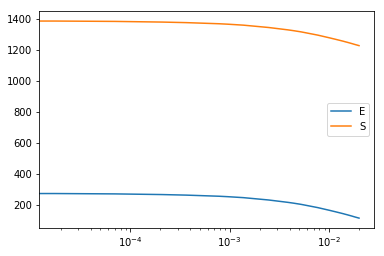

In [7]:
kf=10.
phit=0.001
L=1.0
dur=0.02#1e4
simrun=100
phis=[0.7]
for phi in phis:
    jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)